<a href="https://colab.research.google.com/github/Solo7602/MADPA/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

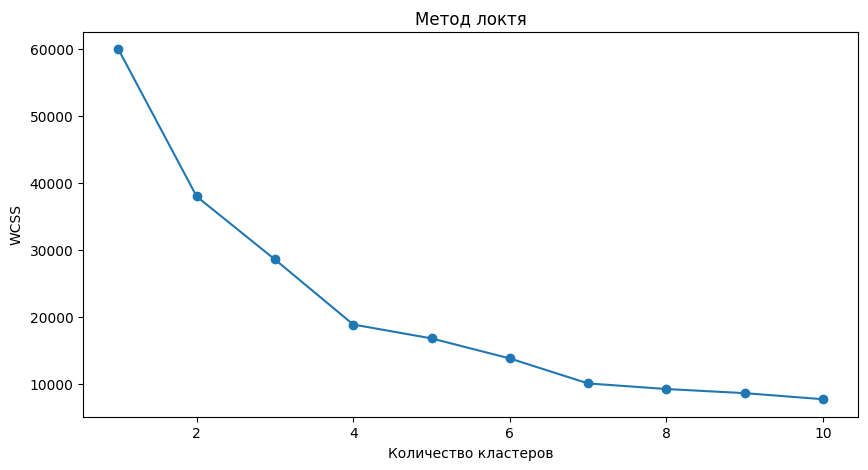

<ipython-input-2-454f36527506>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KMeans_Cluster'] = kmeans_labels


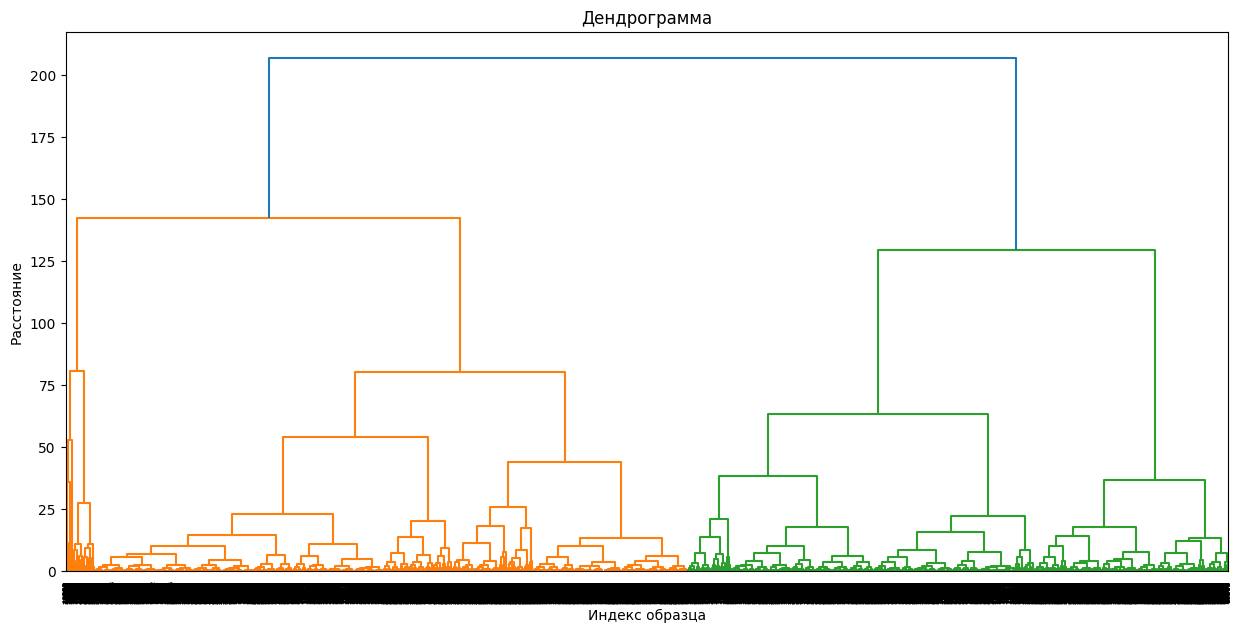

<ipython-input-2-454f36527506>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Agg_Cluster'] = agg_labels


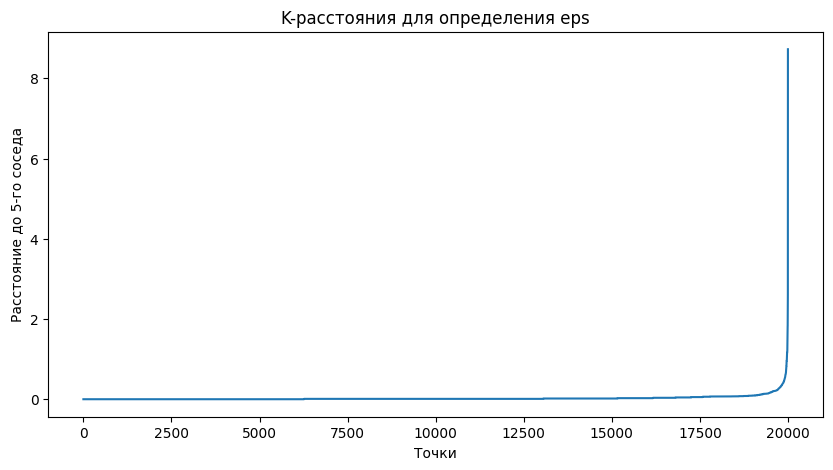

<ipython-input-2-454f36527506>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBSCAN_Cluster'] = dbscan_labels


Оценка K-Means:
Silhouette Score: 0.529
Calinski-Harabasz Index: 14561.480
Davies-Bouldin Index: 0.693

Оценка агломеративной кластеризации:
Silhouette Score: 0.522
Calinski-Harabasz Index: 13313.661
Davies-Bouldin Index: 0.707

Оценка DBSCAN:
Silhouette Score: 0.876
Calinski-Harabasz Index: 693.262
Davies-Bouldin Index: 0.237


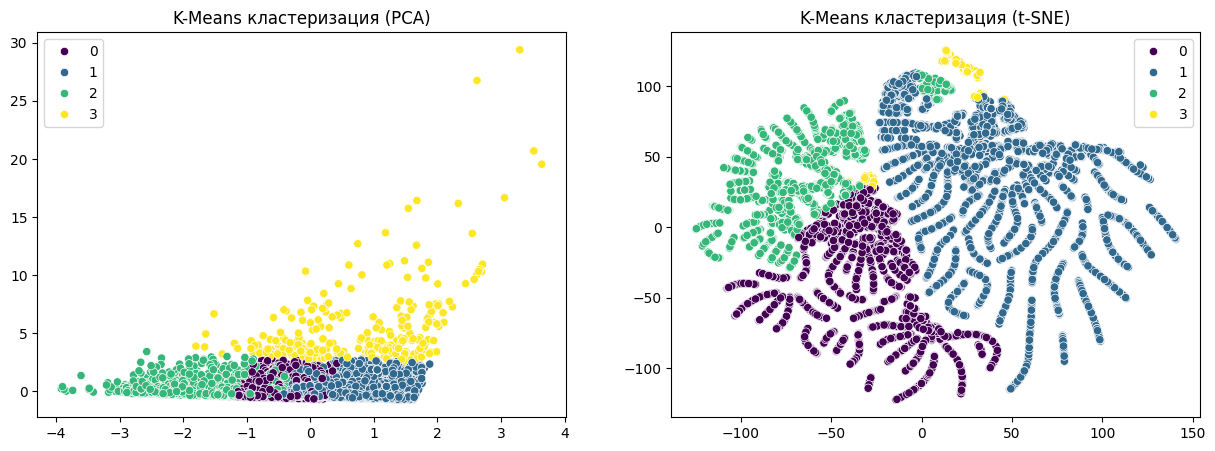

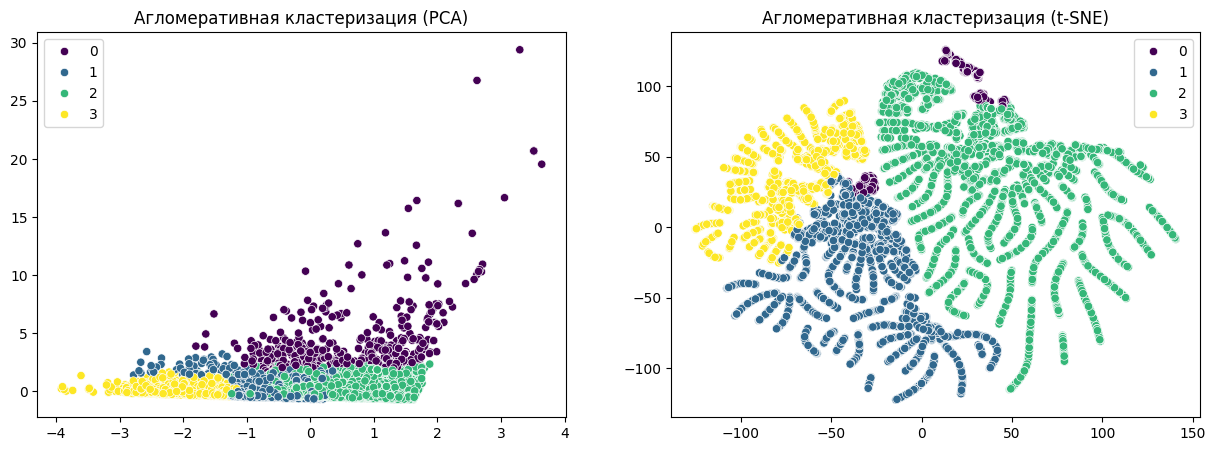

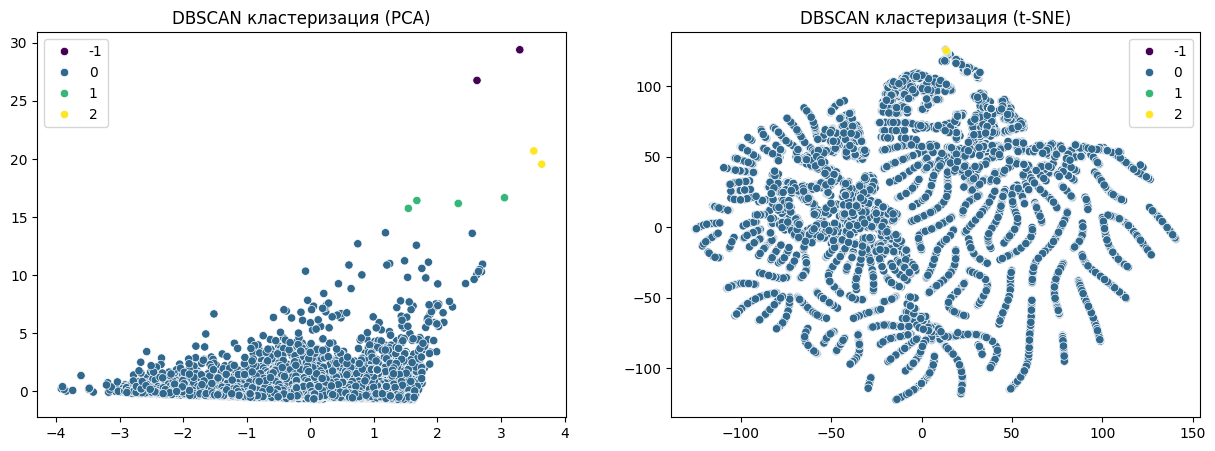


Кластер 1:
Средний возраст: 28.6
Средняя длина комментария: 56.3
Процент мужчин: 100.0%
Количество наблюдений: 10049

Кластер 0:
Средний возраст: 27.5
Средняя длина комментария: 53.4
Процент мужчин: 0.0%
Количество наблюдений: 5755

Кластер 2:
Средний возраст: 57.5
Средняя длина комментария: 52.4
Процент мужчин: 6.2%
Количество наблюдений: 3860

Кластер 3:
Средний возраст: 30.2
Средняя длина комментария: 679.0
Процент мужчин: 61.0%
Количество наблюдений: 336

Сравнение алгоритмов кластеризации:
1. K-Means++:
- Хорошо работает с шарообразными кластерами
- Быстрый и масштабируемый
- Требует указания числа кластеров

2. Агломеративная кластеризация:
- Позволяет анализировать иерархию кластеров
- Не требует предварительного указания числа кластеров
- Менее масштабируема для больших данных

3. DBSCAN:
- Может находить кластеры произвольной формы
- Устойчив к выбросам
- Требует подбора параметров eps и min_samples
- Может плохо работать с кластерами разной плотности

Рекомендации по улучшен

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

# 1. Подготовка данных
data_long = pd.read_csv('sample_data/10k_dataset_processed_final_with_ageGroup.csv')
data = data_long.head(20000)
features = data[['Age', 'Comment_Length', 'Sex_Male']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. K-Means++ кластеризация
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
data['KMeans_Cluster'] = kmeans_labels

# 3. Агломеративная кластеризация
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендрограмма')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(scaled_features)
data['Agg_Cluster'] = agg_labels

# 4. DBSCAN кластеризация
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-расстояния для определения eps')
plt.xlabel('Точки')
plt.ylabel('Расстояние до 5-го соседа')
plt.show()

dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
data['DBSCAN_Cluster'] = dbscan_labels

# 5. Оценка качества кластеризации
def evaluate_clustering(X, labels):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        davies = davies_bouldin_score(X, labels)
        print(f"Silhouette Score: {silhouette:.3f}")
        print(f"Calinski-Harabasz Index: {calinski:.3f}")
        print(f"Davies-Bouldin Index: {davies:.3f}")
    else:
        print("Недостаточно кластеров для оценки")

print("Оценка K-Means:")
evaluate_clustering(scaled_features, kmeans_labels)

print("\nОценка агломеративной кластеризации:")
evaluate_clustering(scaled_features, agg_labels)

print("\nОценка DBSCAN:")
evaluate_clustering(scaled_features, dbscan_labels)

# 6. Визуализация результатов
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means кластеризация (PCA)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means кластеризация (t-SNE)')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=agg_labels, palette='viridis')
plt.title('Агломеративная кластеризация (PCA)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=agg_labels, palette='viridis')
plt.title('Агломеративная кластеризация (t-SNE)')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN кластеризация (PCA)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN кластеризация (t-SNE)')
plt.show()

# 7. Анализ результатов и выводы
for cluster in data['KMeans_Cluster'].unique():
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    print(f"\nКластер {cluster}:")
    print(f"Средний возраст: {cluster_data['Age'].mean():.1f}")
    print(f"Средняя длина комментария: {cluster_data['Comment_Length'].mean():.1f}")
    print(f"Процент мужчин: {cluster_data['Sex_Male'].mean() * 100:.1f}%")
    print(f"Количество наблюдений: {len(cluster_data)}")

print("\nСравнение алгоритмов кластеризации:")
print("1. K-Means++:")
print("- Хорошо работает с шарообразными кластерами")
print("- Быстрый и масштабируемый")
print("- Требует указания числа кластеров")

print("\n2. Агломеративная кластеризация:")
print("- Позволяет анализировать иерархию кластеров")
print("- Не требует предварительного указания числа кластеров")
print("- Менее масштабируема для больших данных")

print("\n3. DBSCAN:")
print("- Может находить кластеры произвольной формы")
print("- Устойчив к выбросам")
print("- Требует подбора параметров eps и min_samples")
print("- Может плохо работать с кластерами разной плотности")

print("\nРекомендации по улучшению:")
print("- Попробовать другие алгоритмы (например, спектральную кластеризацию)")
print("- Использовать другие комбинации признаков")
print("- Применить более сложные методы предобработки данных")
print("- Увеличить объем данных для более устойчивых результатов")